In [ ]:
import sys
!{sys.executable} -m pip install --user scikit-allel

In [1]:
import numpy as np
import scipy
import pandas
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
sns.set_style('ticks')
sns.set_context('notebook')
import h5py
import allel; print('scikit-allel', allel.__version__)

scikit-allel 1.3.8


## VCF to HDF5

In [2]:
allel.vcf_to_hdf5('/users/mcevoysu/scratch/output/Storminalis/vcf_filtering/raw_SNP.vcf.gz', '/users/mcevoysu/scratch/output/Storminalis/scikit-allel/raw_SNP.h5', fields='*')

## Get data

In [3]:
callset_var_fn = '/users/mcevoysu/scratch/output/Storminalis/scikit-allel/raw_SNP.h5'
callset_var = h5py.File(callset_var_fn, mode='r')

In [4]:
calldata_var = callset_var['calldata']
list(calldata_var)

['AD', 'DP', 'GQ', 'GT', 'MIN_DP', 'PGT', 'PID', 'PL', 'PS', 'RGQ', 'SB']

In [5]:
list(callset_var['variants'])

['AC',
 'AF',
 'ALT',
 'AN',
 'BaseQRankSum',
 'CHROM',
 'DP',
 'END',
 'ExcessHet',
 'FILTER_LowQual',
 'FILTER_PASS',
 'FS',
 'ID',
 'InbreedingCoeff',
 'MLEAC',
 'MLEAF',
 'MQ',
 'MQRankSum',
 'POS',
 'QD',
 'QUAL',
 'RAW_MQandDP',
 'REF',
 'ReadPosRankSum',
 'SOR',
 'altlen',
 'is_snp',
 'numalt']

## Make datasets

In [6]:
variants = allel.VariantChunkedTable(callset_var['variants'])
variants

<VariantChunkedTable shape=(326562,) dtype=[('AC', '<i4', (3,)), ('AF', '<f4', (3,)), ('ALT', 'O', (3,)), ('AN', '<i4'), ('BaseQRankSum', '<f4'), ('CHROM', 'O'), ('DP', '<i4'), ('END', '<i4'), ('ExcessHet', '<f4'), ('FILTER_LowQual', '?'), ('FILTER_PASS', '?'), ('FS', '<f4'), ('ID', 'O'), ('InbreedingCoeff', '<f4'), ('MLEAC', '<i4', (3,)), ('MLEAF', '<f4', (3,)), ('MQ', '<f4'), ('MQRankSum', '<f4'), ('POS', '<i4'), ('QD', '<f4'), ('QUAL', '<f4'), ('RAW_MQandDP', '<i4', (2,)), ('REF', 'O'), ('ReadPosRankSum', '<f4'), ('SOR', '<f4'), ('altlen', '<i4', (3,)), ('is_snp', '?'), ('numalt', '<i4')]
   nbytes=55.7M cbytes=12.2M cratio=4.6
   values=h5py._hl.group.Group>

In [7]:
variants_np = variants[:]
rawsnps = variants_np.query('(is_snp == True)')
rawsnps

<VariantTable shape=(224154,) dtype=(numpy.record, [('AC', '<i4', (3,)), ('AF', '<f4', (3,)), ('ALT', 'O', (3,)), ('AN', '<i4'), ('BaseQRankSum', '<f4'), ('CHROM', 'O'), ('DP', '<i4'), ('END', '<i4'), ('ExcessHet', '<f4'), ('FILTER_LowQual', '?'), ('FILTER_PASS', '?'), ('FS', '<f4'), ('ID', 'O'), ('InbreedingCoeff', '<f4'), ('MLEAC', '<i4', (3,)), ('MLEAF', '<f4', (3,)), ('MQ', '<f4'), ('MQRankSum', '<f4'), ('POS', '<i4'), ('QD', '<f4'), ('QUAL', '<f4'), ('RAW_MQandDP', '<i4', (2,)), ('REF', 'O'), ('ReadPosRankSum', '<f4'), ('SOR', '<f4'), ('altlen', '<i4', (3,)), ('is_snp', '?'), ('numalt', '<i4')])>
[([ 2, -1, -1], [0.004032,      nan,      nan], [b'G', b'', b''], 492, nan, b'Chr01',  305, -1, 0.    , False, False, 0., b'.', 0.3375, [  3,  -1,  -1], [0.006048,      nan,      nan], 40.  ,  nan,    16961, 25.36,   74.71, [-1, -1], b'T',    nan, 2.303, [0, 0, 0],  True, 1)
 ([14, -1, -1], [0.028   ,      nan,      nan], [b'G', b'', b''], 492,  0., b'Chr01',  639, -1, 0.    , False, False, 0., b'.', 0.3102, [ 17,  -1,  -1], [0.034   ,      nan,      nan], 40.  , 0.  ,    17068, 29.17,  816.82, [-1, -1], b'A',  0.   , 2.468, [0, 0, 0],  True, 1)
 ([ 2, -1, -1], [0.004032,      nan,      nan], [b'G', b'', b''], 492,  0., b'Chr01', 1090, -1, 0.0097, False, False, 0., b'.', 0.2015, [  3,  -1,  -1], [0.006048,      nan,      nan], 42.81, 1.23,    17118, 18.05,  288.76, [-1, -1], b'T', -0.779, 0.191, [0, 0, 0],  True, 1)
 ...
 ([47, -1, -1], [0.099   ,      nan,      nan], [b'G', b'', b''], 492,  0., b'Chr17',  344, -1, 0.    , False, False, 0., b'.', 0.3375, [160,  -1,  -1], [0.323   ,      nan,      nan], 60.  , 0.  , 34338500, 28.2 , 5999.68, [-1, -1], b'T',  0.424, 2.862, [0, 0, 0],  True, 1)
 ([ 2, -1, -1], [0.004032,      nan,      nan], [b'T', b'', b''], 492, nan, b'Chr17',  281, -1, 0.    , False, False, 0., b'.', 0.311 , [  4,  -1,  -1], [0.008065,      nan,      nan], 60.  ,  nan, 34338509, 25.  ,   76.31, [-1, -1], b'G',    nan, 2.303, [0, 0, 0],  True, 1)
 ([ 1, -1, -1], [0.002016,      nan,      nan], [b'T', b'', b''], 492,  0., b'Chr17',  272, -1, 0.    , False, False, 0., b'.', 0.3189, [  3,  -1,  -1], [0.006048,      nan,      nan], 60.  , 0.  , 34338515,  6.35,   31.75, [-1, -1], b'G', -0.524, 0.446, [0, 0, 0],  True, 1)]

In [8]:
notsnp = variants_np.query('(is_snp != True)')
notsnp

<VariantTable shape=(102408,) dtype=(numpy.record, [('AC', '<i4', (3,)), ('AF', '<f4', (3,)), ('ALT', 'O', (3,)), ('AN', '<i4'), ('BaseQRankSum', '<f4'), ('CHROM', 'O'), ('DP', '<i4'), ('END', '<i4'), ('ExcessHet', '<f4'), ('FILTER_LowQual', '?'), ('FILTER_PASS', '?'), ('FS', '<f4'), ('ID', 'O'), ('InbreedingCoeff', '<f4'), ('MLEAC', '<i4', (3,)), ('MLEAF', '<f4', (3,)), ('MQ', '<f4'), ('MQRankSum', '<f4'), ('POS', '<i4'), ('QD', '<f4'), ('QUAL', '<f4'), ('RAW_MQandDP', '<i4', (2,)), ('REF', 'O'), ('ReadPosRankSum', '<f4'), ('SOR', '<f4'), ('altlen', '<i4', (3,)), ('is_snp', '?'), ('numalt', '<i4')])>
[([ 91,  -1,  -1], [0.19    ,      nan,      nan], [b'*', b'', b''], 492, -1.56 , b'Chr01', 14014, -1, 0.00000e+00,  True, False, 0.   , b'.',  0.3397, [ 95,  -1,  -1], [0.192   ,      nan,      nan], 60.  ,  0.  ,   445170, 0., 0.  , [-1, -1], b'C', -0.478, 0.722, [-1,  0,  0], False, 1)
 ([ 87,  -1,  -1], [0.181   ,      nan,      nan], [b'*', b'', b''], 492, -0.579, b'Chr01', 14060, -1, 0.00000e+00,  True, False, 0.   , b'.',  0.3705, [ 92,  -1,  -1], [0.185   ,      nan,      nan], 60.  ,  0.  ,   445171, 0., 0.  , [-1, -1], b'T',  2.52 , 0.668, [-1,  0,  0], False, 1)
 ([ 84,  -1,  -1], [0.175   ,      nan,      nan], [b'*', b'', b''], 492, -0.76 , b'Chr01', 14043, -1, 0.00000e+00,  True, False, 0.   , b'.',  0.3979, [ 90,  -1,  -1], [0.181   ,      nan,      nan], 60.  ,  0.  ,   445172, 0., 0.  , [-1, -1], b'T',  4.79 , 0.661, [-1,  0,  0], False, 1)
 ...
 ([157,  -1,  -1], [0.321   ,      nan,      nan], [b'*', b'', b''], 492, -0.711, b'Chr17', 54013, -1, 1.69261e+02,  True, False, 0.625, b'.', -0.6902, [211,  -1,  -1], [0.425   ,      nan,      nan], 59.76, -2.72, 34329895, 0., 0.04, [-1, -1], b'A', -3.148, 0.664, [-1,  0,  0], False, 1)
 ([  2,  -1,  -1], [0.004032,      nan,      nan], [b'*', b'', b''], 492,    nan, b'Chr17', 52847, -1, 8.80000e-03,  True, False, 0.   , b'.',  0.2175, [  2,  -1,  -1], [0.004032,      nan,      nan],   nan,   nan, 34329896, 0., 0.  , [-1, -1], b'G',    nan, 0.721, [-1,  0,  0], False, 1)
 ([  1,  -1,  -1], [0.002016,      nan,      nan], [b'*', b'', b''], 492,    nan, b'Chr17', 52834, -1, 0.00000e+00,  True, False, 1.548, b'.',  0.3306, [  1,  -1,  -1], [0.002016,      nan,      nan],   nan,   nan, 34329897, 0., 0.  , [-1, -1], b'G',    nan, 0.824, [-1,  0,  0], False, 1)]

## Plot function

In [9]:
def plot_hist(f, dsubset='', bins=30, ):
    if dsubset == 'var':
        x = variants[f][:]
        l = 'Variant'
    elif dsubset == 'snp':
        x = rawsnps[f][:]
        l = 'Raw SNP'
    elif dsubset == 'notsnp':
        x = notsnp[f][:]
        l = 'Raw Not SNP'
    elif dsubset == 'biallelic':
        x = biallelic_np[f][:]
        l = 'Biallelic SNP'
    elif dsubset == 'varsel':
        x = var_selection[f][:]
        l = 'Filtered Variants'
    elif dsubset == 'snpsel':
        x = snp_selection[f][:]
        l = 'Filtered SNP'
    else:
        x = bi_selection[f][:]
        l = 'Biallelic SNP'
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.despine(ax=ax, offset=10)
    ax.hist(x, bins=bins)
    ax.set_xlabel(f)
    ax.set_ylabel('No. variants')
    ax.set_title('%s %s distribution' % (l, f))

## Find Biallelic SNPS

In [10]:
numalt = rawsnps['numalt']
np.max(numalt)

3

In [11]:
count_numalt = np.bincount(numalt)
count_numalt

array([     0, 219517,   4526,    111])

In [12]:
n_multiallelic = np.sum(count_numalt[2:])
n_multiallelic

4637

In [13]:
filter_expression = '(numalt == 1)'
biallelic_np = rawsnps.query(filter_expression)[:]
biallelic_np

<VariantTable shape=(219517,) dtype=(numpy.record, [('AC', '<i4', (3,)), ('AF', '<f4', (3,)), ('ALT', 'O', (3,)), ('AN', '<i4'), ('BaseQRankSum', '<f4'), ('CHROM', 'O'), ('DP', '<i4'), ('END', '<i4'), ('ExcessHet', '<f4'), ('FILTER_LowQual', '?'), ('FILTER_PASS', '?'), ('FS', '<f4'), ('ID', 'O'), ('InbreedingCoeff', '<f4'), ('MLEAC', '<i4', (3,)), ('MLEAF', '<f4', (3,)), ('MQ', '<f4'), ('MQRankSum', '<f4'), ('POS', '<i4'), ('QD', '<f4'), ('QUAL', '<f4'), ('RAW_MQandDP', '<i4', (2,)), ('REF', 'O'), ('ReadPosRankSum', '<f4'), ('SOR', '<f4'), ('altlen', '<i4', (3,)), ('is_snp', '?'), ('numalt', '<i4')])>
[([ 2, -1, -1], [0.004032,      nan,      nan], [b'G', b'', b''], 492, nan, b'Chr01',  305, -1, 0.    , False, False, 0., b'.', 0.3375, [  3,  -1,  -1], [0.006048,      nan,      nan], 40.  ,  nan,    16961, 25.36,   74.71, [-1, -1], b'T',    nan, 2.303, [0, 0, 0],  True, 1)
 ([14, -1, -1], [0.028   ,      nan,      nan], [b'G', b'', b''], 492,  0., b'Chr01',  639, -1, 0.    , False, False, 0., b'.', 0.3102, [ 17,  -1,  -1], [0.034   ,      nan,      nan], 40.  , 0.  ,    17068, 29.17,  816.82, [-1, -1], b'A',  0.   , 2.468, [0, 0, 0],  True, 1)
 ([ 2, -1, -1], [0.004032,      nan,      nan], [b'G', b'', b''], 492,  0., b'Chr01', 1090, -1, 0.0097, False, False, 0., b'.', 0.2015, [  3,  -1,  -1], [0.006048,      nan,      nan], 42.81, 1.23,    17118, 18.05,  288.76, [-1, -1], b'T', -0.779, 0.191, [0, 0, 0],  True, 1)
 ...
 ([47, -1, -1], [0.099   ,      nan,      nan], [b'G', b'', b''], 492,  0., b'Chr17',  344, -1, 0.    , False, False, 0., b'.', 0.3375, [160,  -1,  -1], [0.323   ,      nan,      nan], 60.  , 0.  , 34338500, 28.2 , 5999.68, [-1, -1], b'T',  0.424, 2.862, [0, 0, 0],  True, 1)
 ([ 2, -1, -1], [0.004032,      nan,      nan], [b'T', b'', b''], 492, nan, b'Chr17',  281, -1, 0.    , False, False, 0., b'.', 0.311 , [  4,  -1,  -1], [0.008065,      nan,      nan], 60.  ,  nan, 34338509, 25.  ,   76.31, [-1, -1], b'G',    nan, 2.303, [0, 0, 0],  True, 1)
 ([ 1, -1, -1], [0.002016,      nan,      nan], [b'T', b'', b''], 492,  0., b'Chr17',  272, -1, 0.    , False, False, 0., b'.', 0.3189, [  3,  -1,  -1], [0.006048,      nan,      nan], 60.  , 0.  , 34338515,  6.35,   31.75, [-1, -1], b'G', -0.524, 0.446, [0, 0, 0],  True, 1)]

## MQ - RMS mapping quality

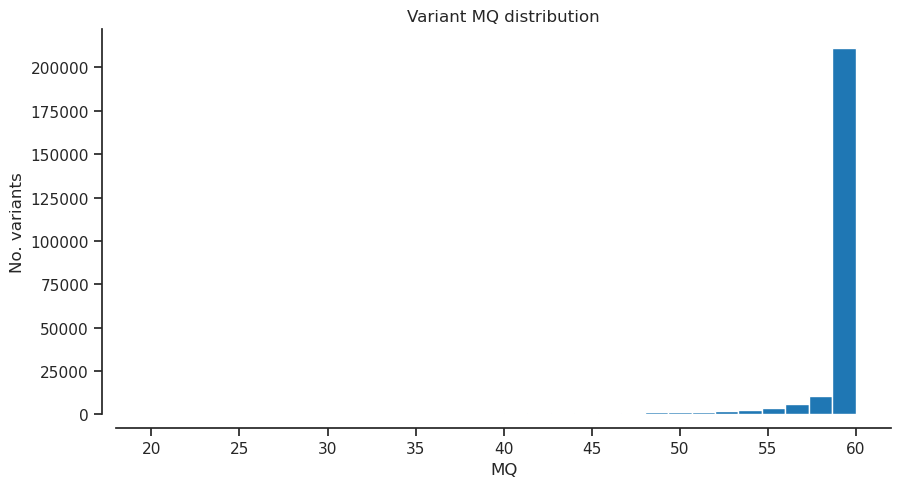

In [14]:
plot_hist('MQ','var') # RMS mapping quality

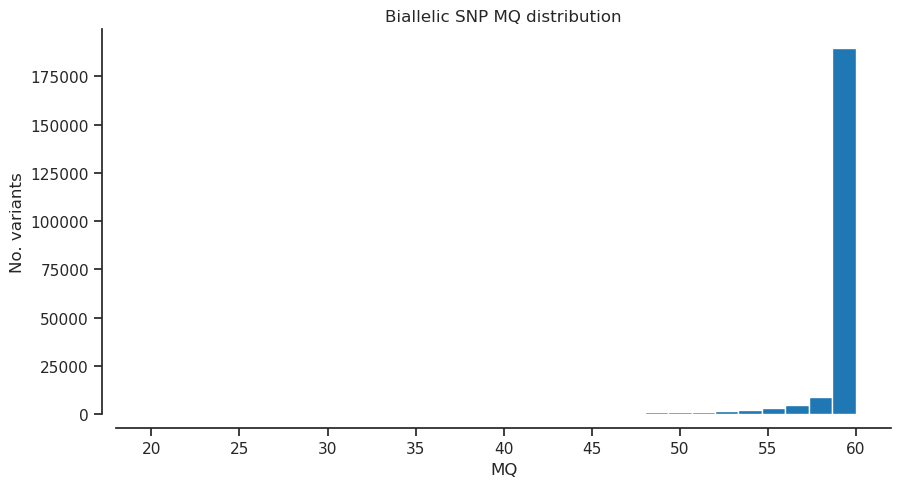

In [15]:
plot_hist('MQ','biallelic') # RMS mapping quality

In [16]:
filter_expression = '(MQ < 55)'
bi_selection = biallelic_np.query(filter_expression)[:]
#np.count_nonzero(var_selection)

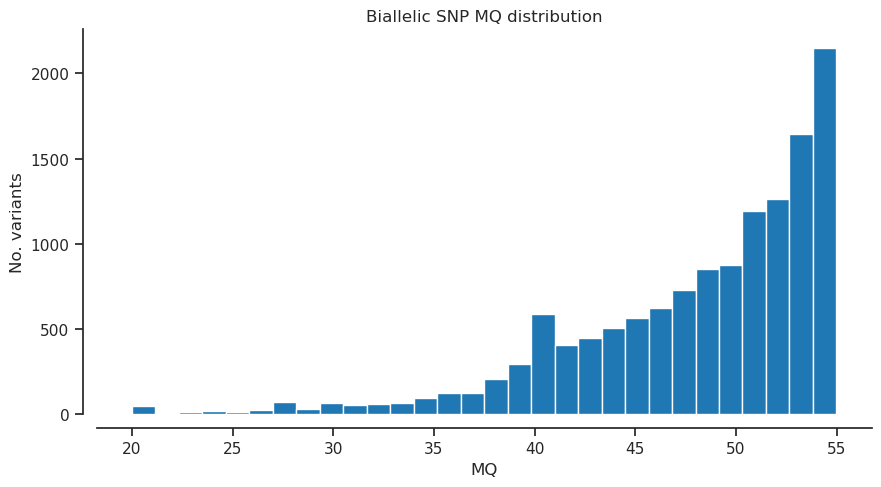

In [17]:
plot_hist('MQ')

In [18]:
filter_expression = '(MQ < 40)'
bi_selection = biallelic_np.query(filter_expression)[:]

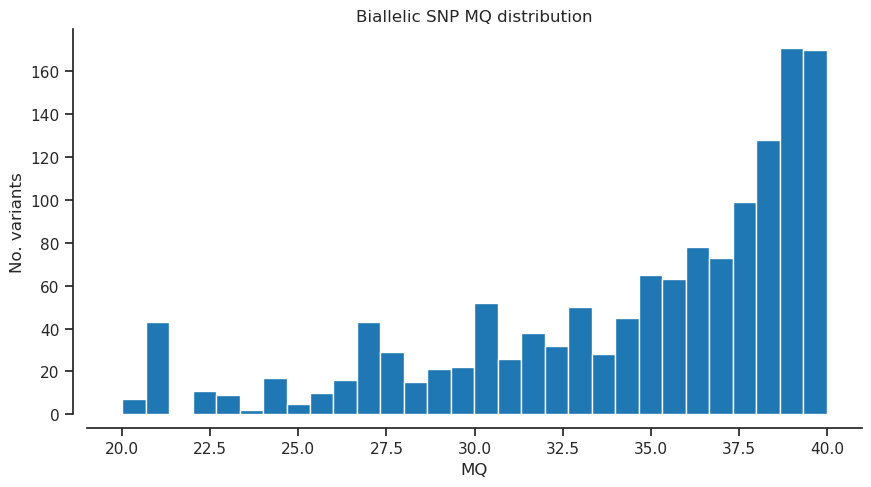

In [19]:
plot_hist('MQ')

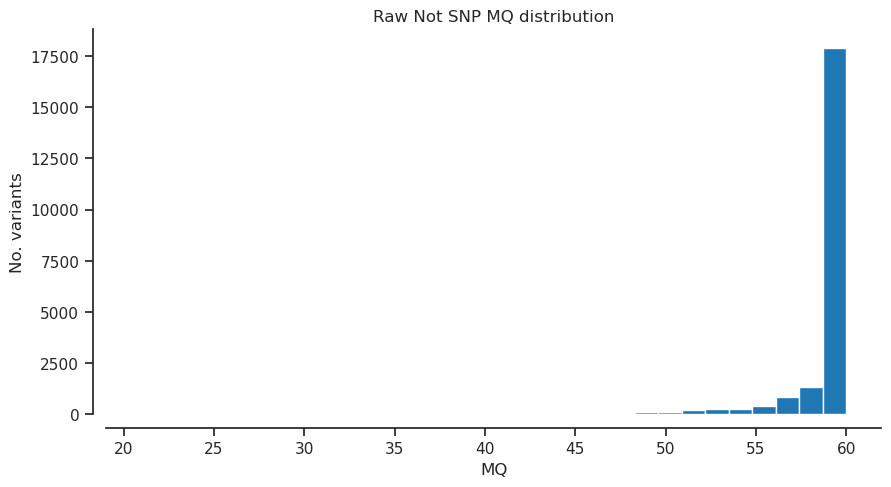

In [20]:
plot_hist('MQ','notsnp')

## QD - Variant Confidence/Quality by Depth

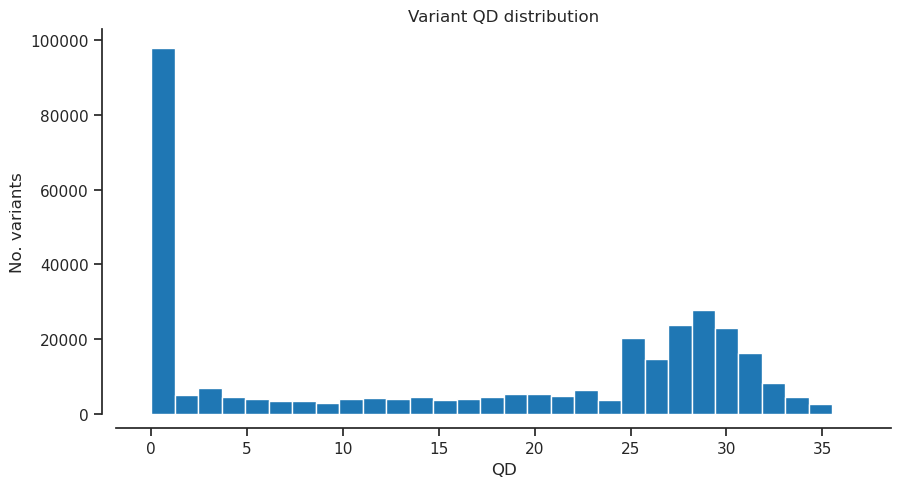

In [21]:
plot_hist('QD','var') # Variant Confidence/Quality by Depth

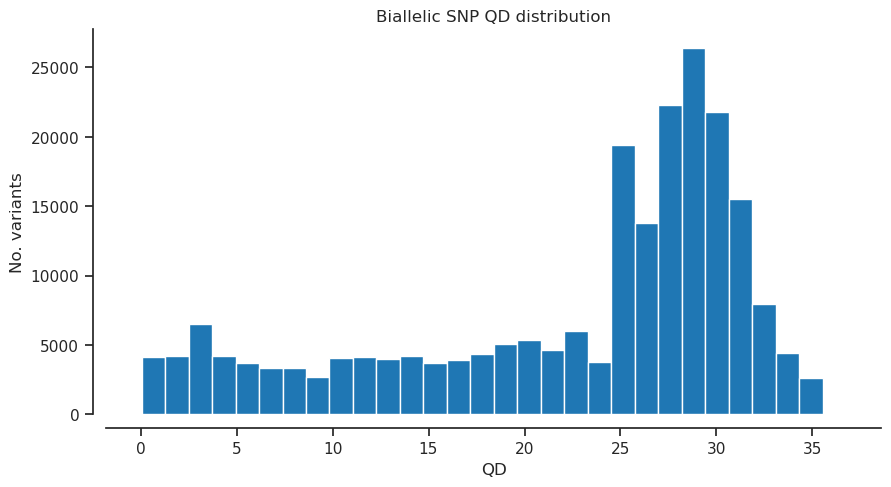

In [22]:
plot_hist('QD','biallelic') # Variant Confidence/Quality by Depth

In [23]:
filter_expression = '(QD < 2)'
bi_selection = biallelic_np.query(filter_expression)[:]

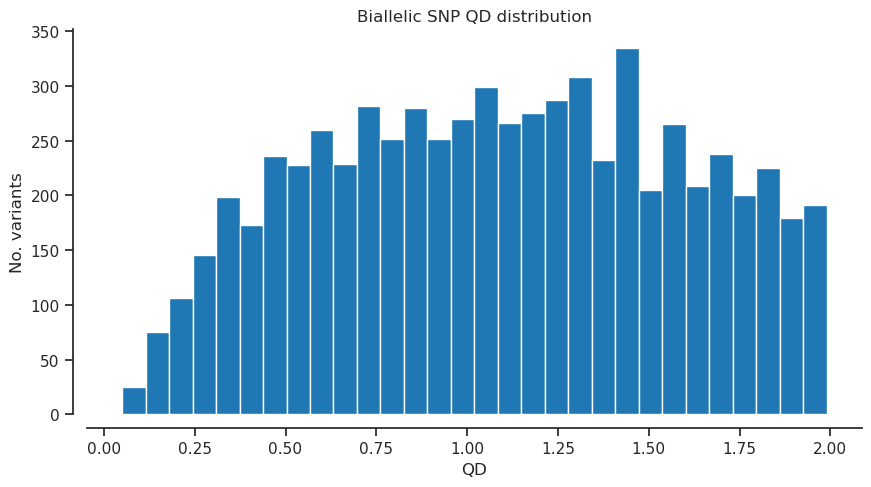

In [24]:
plot_hist('QD')

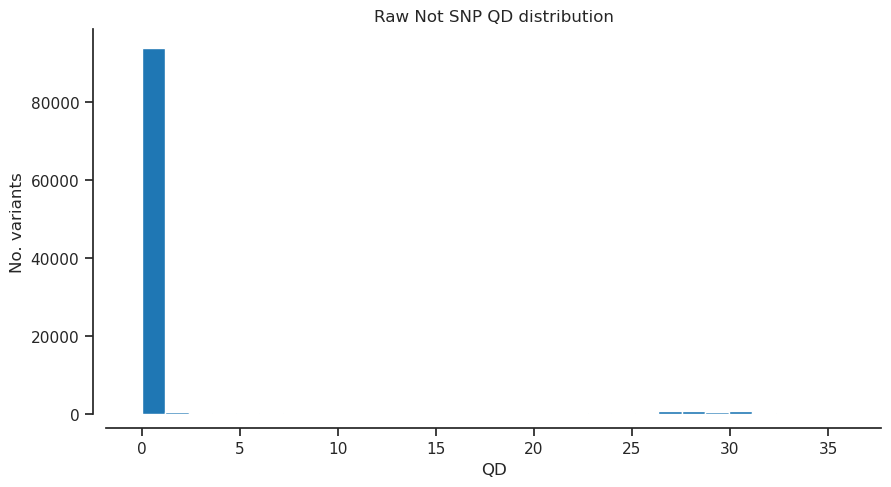

In [25]:
plot_hist('QD','notsnp') # Variant Confidence/Quality by Depth

## SOR - Symmetric Odds Ratio of 2x2 contingency table to detect strand bias

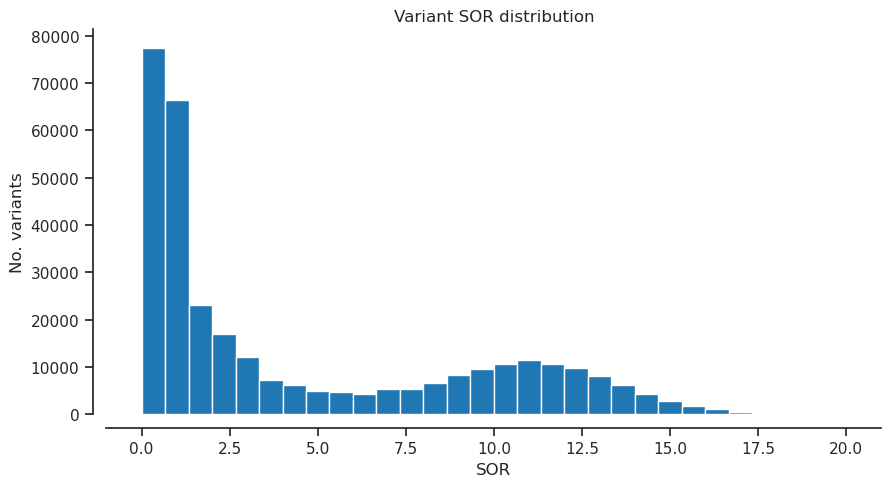

In [26]:
plot_hist('SOR', 'var') # Symmetric Odds Ratio of 2x2 contingency table to detect strand bias

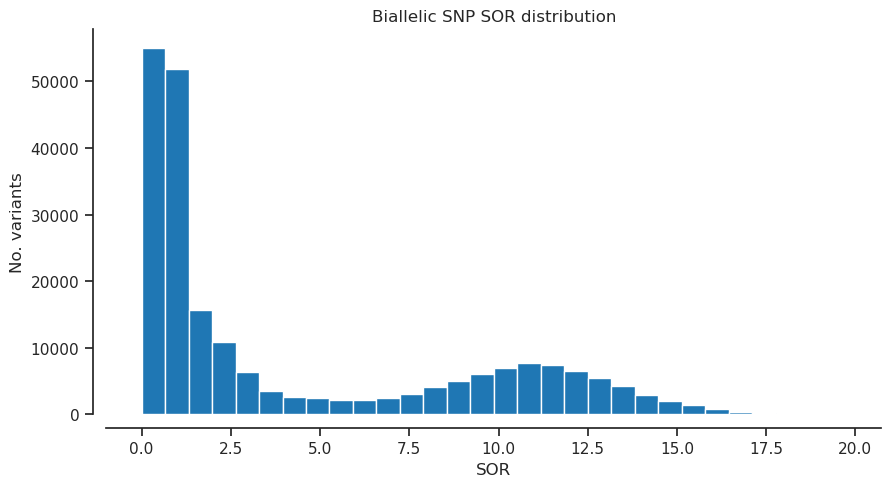

In [27]:
plot_hist('SOR','biallelic') # Symmetric Odds Ratio of 2x2 contingency table to detect strand bias

In [28]:
filter_expression = '(SOR > 3)'
bi_selection = biallelic_np.query(filter_expression)[:]

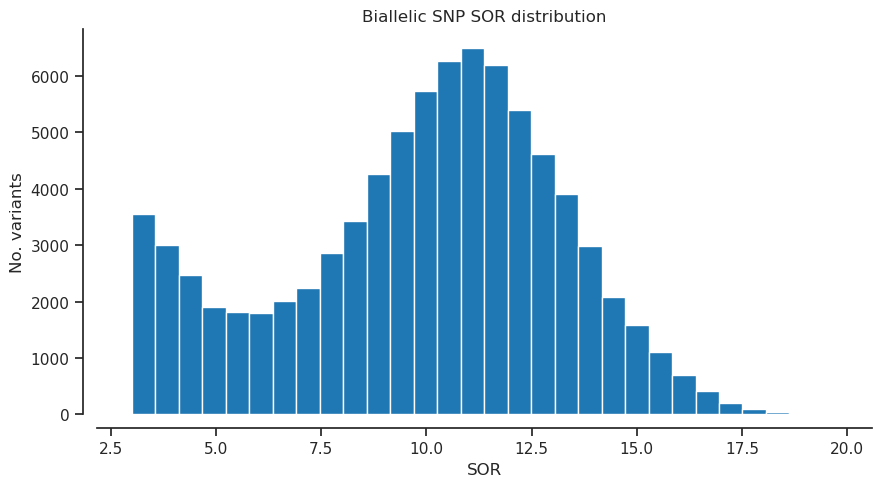

In [29]:
plot_hist('SOR') # Symmetric Odds Ratio of 2x2 contingency table to detect strand bias

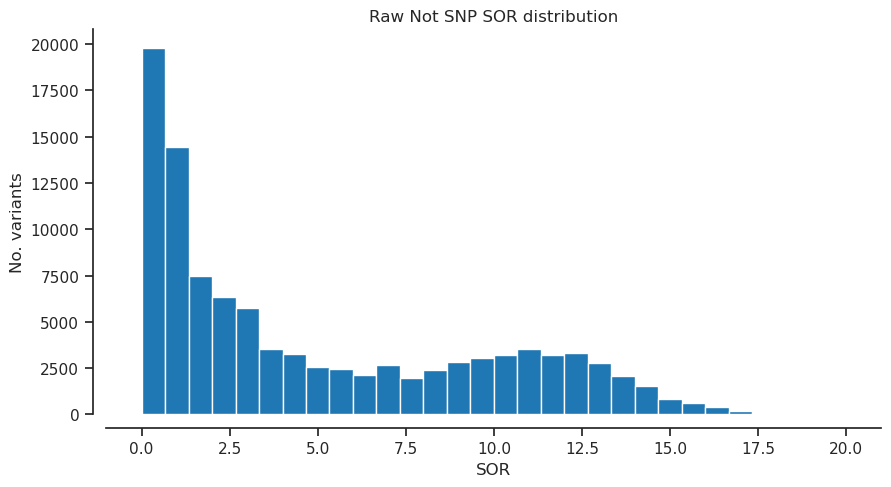

In [30]:
plot_hist('SOR','notsnp') # Symmetric Odds Ratio of 2x2 contingency table to detect strand bias

## MQRankSum - Z-score From Wilcoxon rank sum test of Alt vs. Ref read mapping qualities

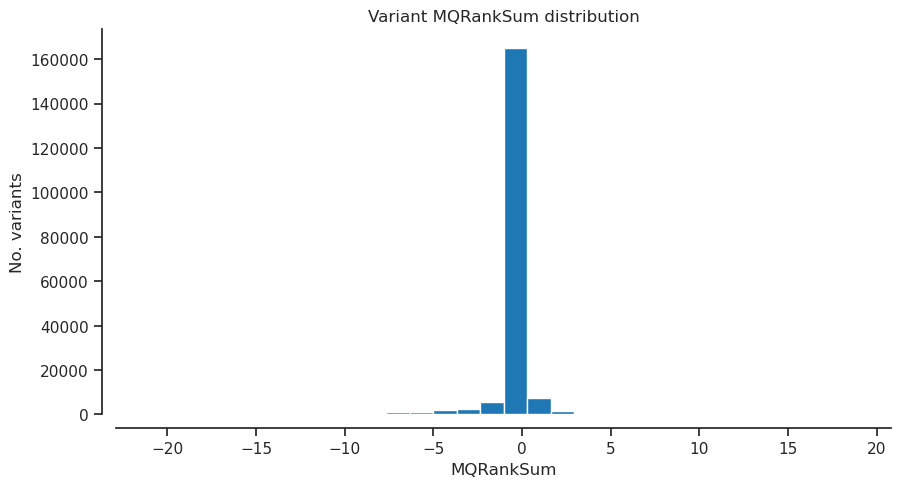

In [31]:
plot_hist('MQRankSum','var') # Z-score From Wilcoxon rank sum test of Alt vs. Ref read mapping qualities

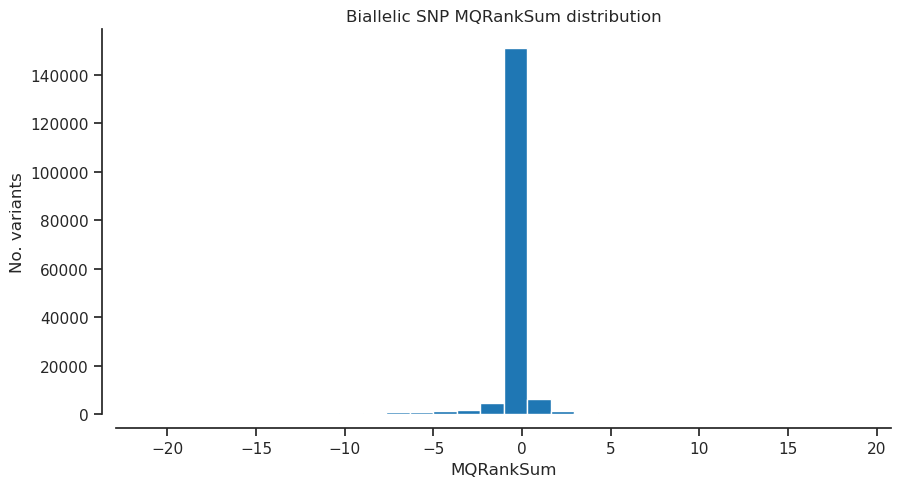

In [32]:
plot_hist('MQRankSum','biallelic') # Z-score From Wilcoxon rank sum test of Alt vs. Ref read mapping qualities

In [33]:
filter_expression = '(MQRankSum < -12.5)'
bi_selection = biallelic_np.query(filter_expression)[:]

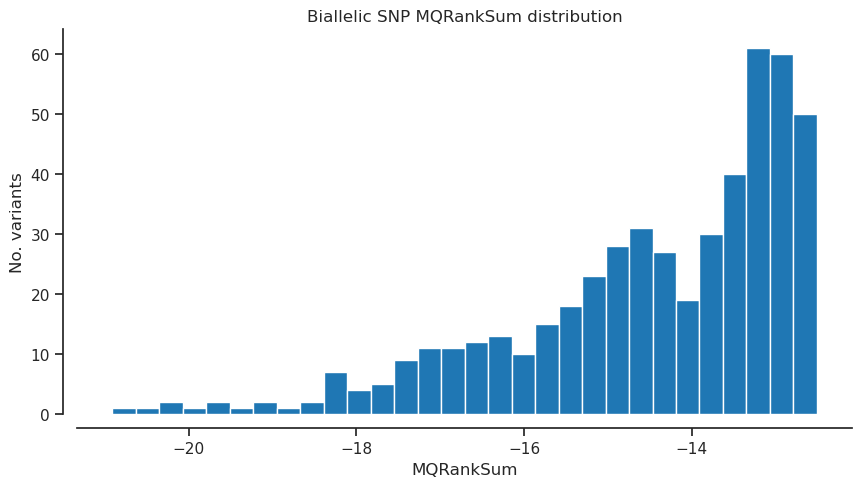

In [34]:
plot_hist('MQRankSum') # Z-score From Wilcoxon rank sum test of Alt vs. Ref read mapping qualities

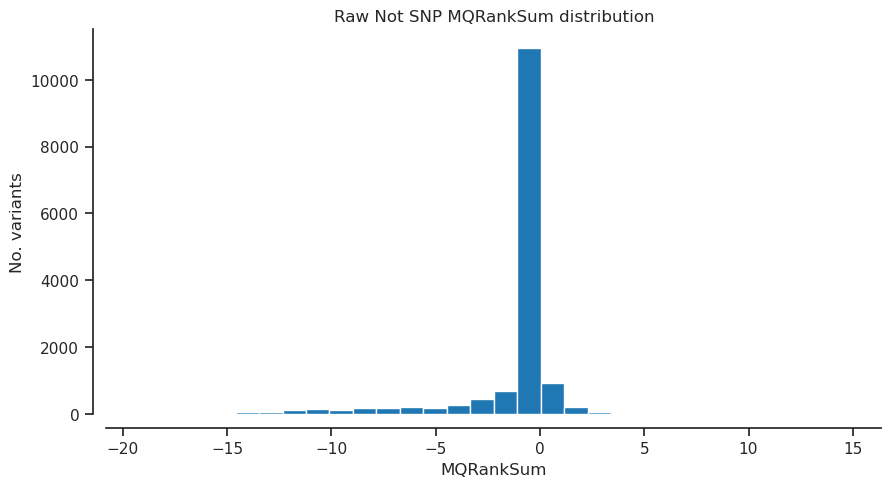

In [35]:
plot_hist('MQRankSum','notsnp') # Z-score From Wilcoxon rank sum test of Alt vs. Ref read mapping qualities

## ReadPosRankSum - Z-score from Wilcoxon rank sum test of Alt vs. Ref read position bias

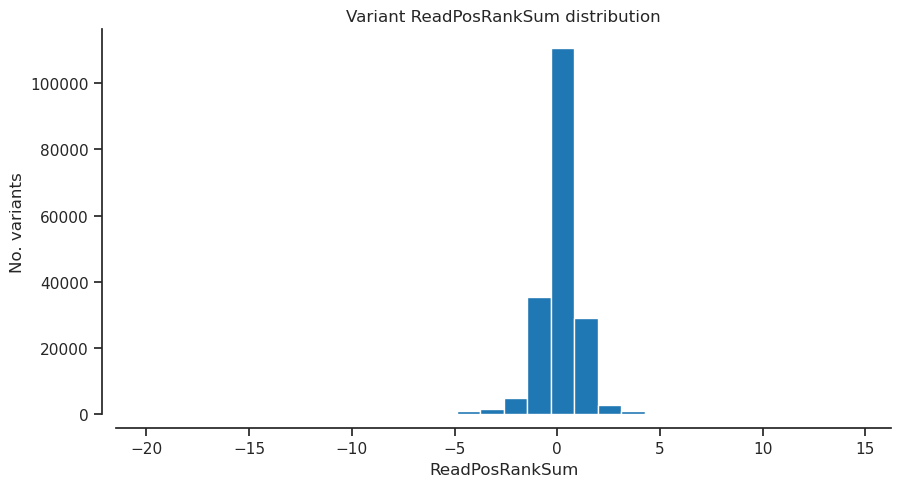

In [36]:
plot_hist('ReadPosRankSum','var') # Z-score from Wilcoxon rank sum test of Alt vs. Ref read position bias

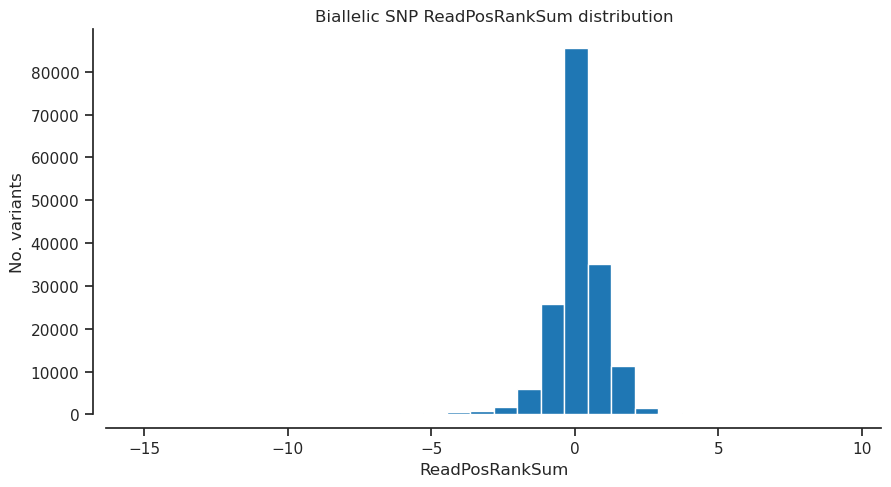

In [37]:
plot_hist('ReadPosRankSum','biallelic') # Z-score from Wilcoxon rank sum test of Alt vs. Ref read position bias

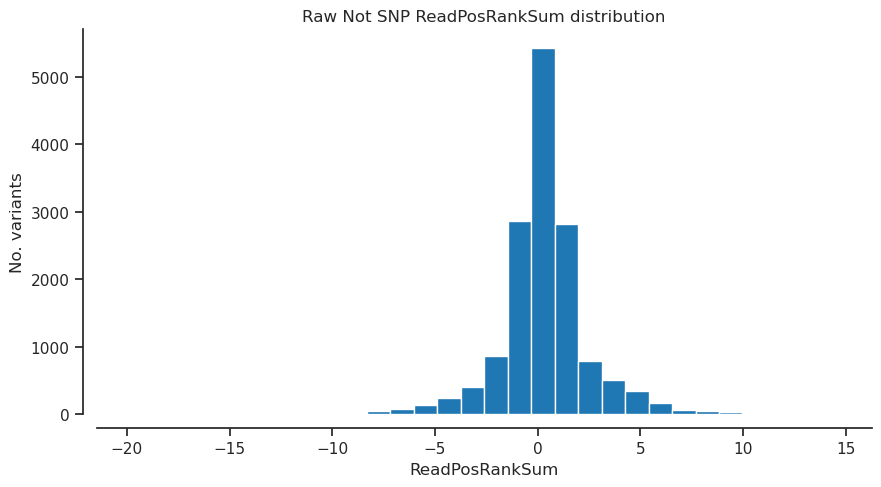

In [38]:
plot_hist('ReadPosRankSum','notsnp') # Z-score from Wilcoxon rank sum test of Alt vs. Ref read position bias

## DP - Approximate read depth

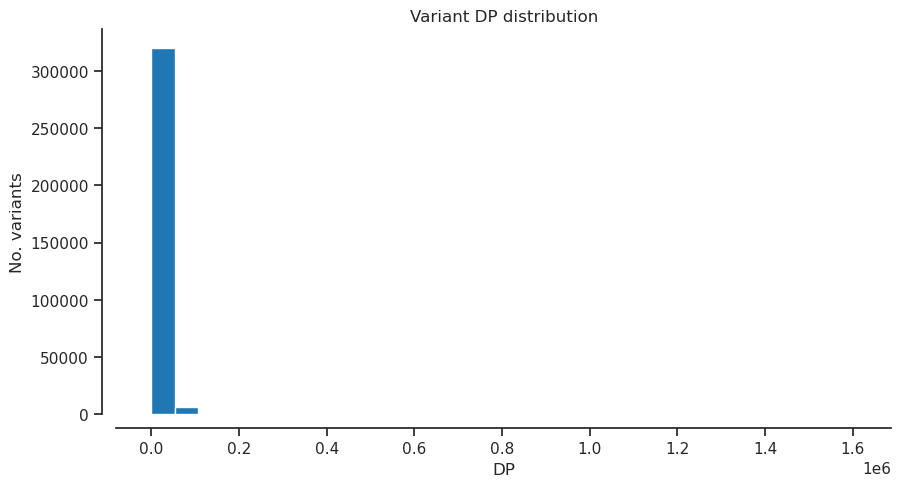

In [39]:
plot_hist('DP','var')

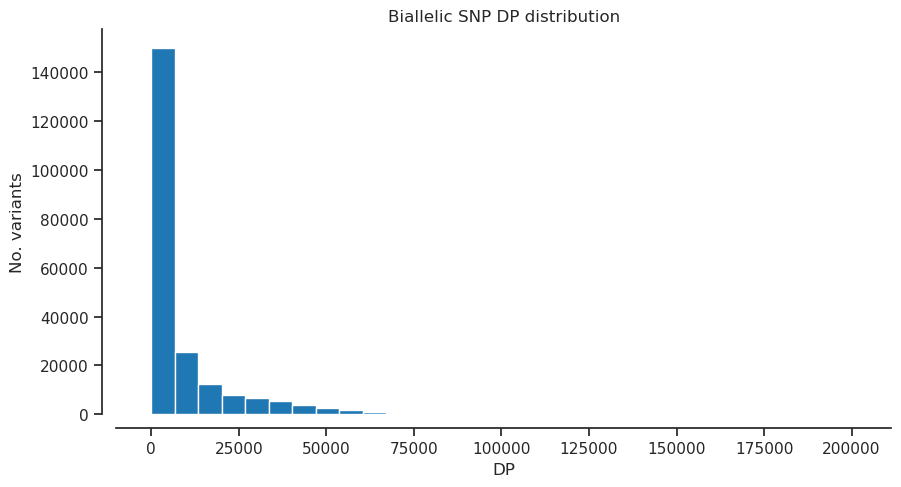

In [40]:
plot_hist('DP','biallelic')

In [41]:
filter_expression = '(DP > 20000) & (DP < 40000)'
bi_selection = biallelic_np.query(filter_expression)[:]

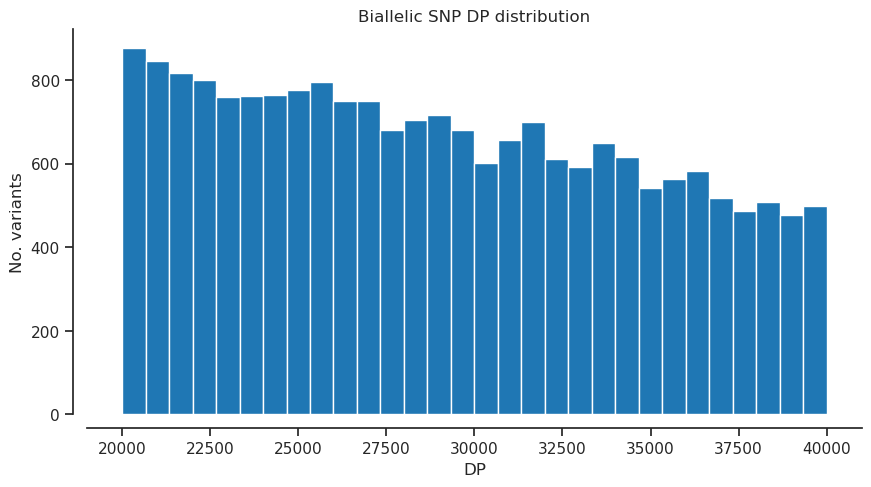

In [42]:
plot_hist('DP')

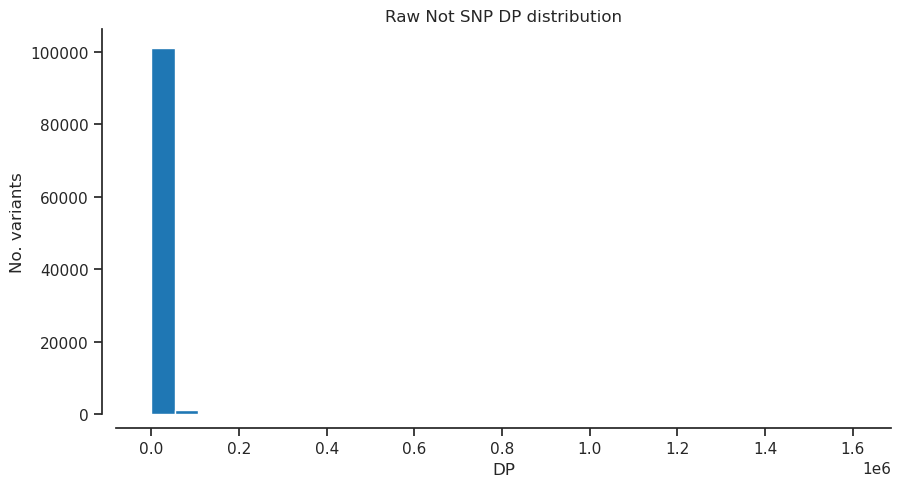

In [43]:
plot_hist('DP','notsnp')

## AN - Total number of alleles in called genotypes

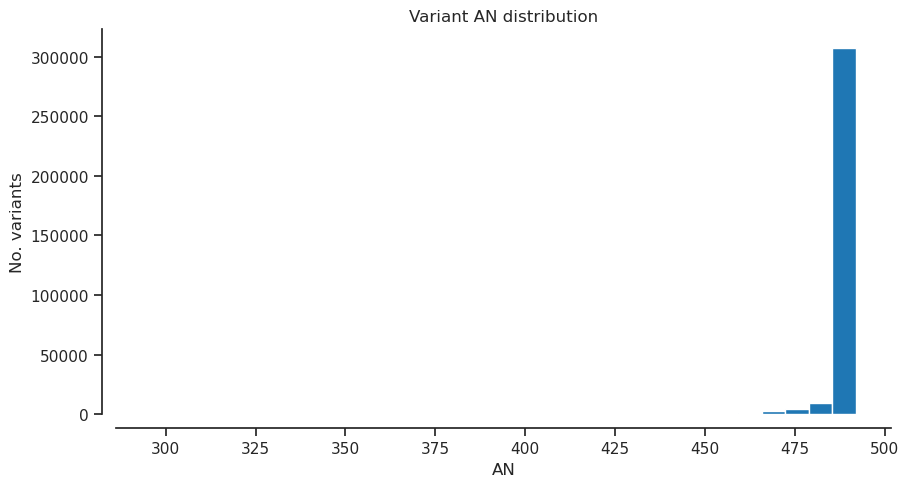

In [44]:
plot_hist('AN','var') # Total number of alleles in called genotypes

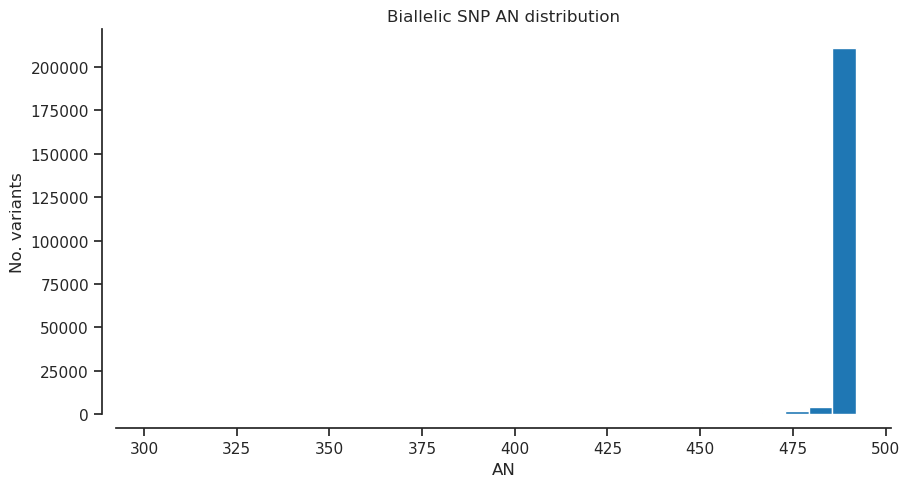

In [45]:
plot_hist('AN','biallelic') # Total number of alleles in called genotypes

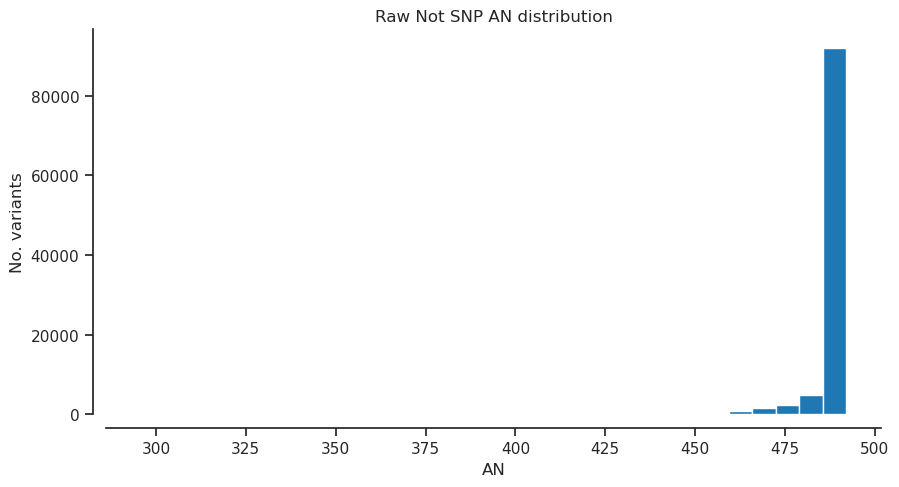

In [46]:
plot_hist('AN','notsnp') # Total number of alleles in called genotypes

## Selected filter

In [47]:
# QD: Variant Confidence/Quality by Depth
# AN: Total number of alleles in called genotypes
filter_expression = '(QD >= 2) & (MQ >= 40) & (MQRankSum >= -12.5) & (is_snp)'
variant_selection = variants_np.eval(filter_expression)[:]
np.count_nonzero(variant_selection)

167572

## Genotype

In [48]:
calldata_var = callset_var['calldata']
list(calldata_var)

['AD', 'DP', 'GQ', 'GT', 'MIN_DP', 'PGT', 'PID', 'PL', 'PS', 'RGQ', 'SB']

In [49]:
genotypes_var = allel.GenotypeChunkedArray(calldata_var['GT'])
genotypes_var

<GenotypeChunkedArray shape=(326562, 246, 2) dtype=int8 chunks=(65536, 64, 2)
   nbytes=153.2M cbytes=11.8M cratio=13.0
   compression=gzip compression_opts=1
   values=h5py._hl.dataset.Dataset>

In [50]:
# using the selected filters set above
gt_filtered_snps = genotypes_var.subset(variant_selection)
gt_filtered_snps

<GenotypeChunkedArray shape=(167572, 246, 2) dtype=int8 chunks=(2619, 246, 2)
   nbytes=78.6M cbytes=11.5M cratio=6.8
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [51]:
# grab the allele counts for the populations
ac = gt_filtered_snps.count_alleles()
ac

<AlleleCountsChunkedArray shape=(167572, 4) dtype=int32 chunks=(20947, 4)
   nbytes=2.6M cbytes=579.1K cratio=4.5
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [52]:
ac[:]

<AlleleCountsArray shape=(167572, 4) dtype=int32>
478  14   0   0
490   2   0   0
491   1   0   0
...
489   3   0   0
445  47   0   0
491   1   0   0

In [53]:
# Which ones are biallelic?
is_biallelic_01 = ac.is_biallelic_01()[:]
ac1 = ac.compress(is_biallelic_01, axis=0)[:, :2]
ac1
##this part of the code is only for graphing the SFS, is not useful for filtering biallelic sites

array([[478,  14],
       [490,   2],
       [491,   1],
       ...,
       [489,   3],
       [445,  47],
       [491,   1]], dtype=int32)

<Axes: xlabel='derived allele frequency', ylabel='site frequency'>

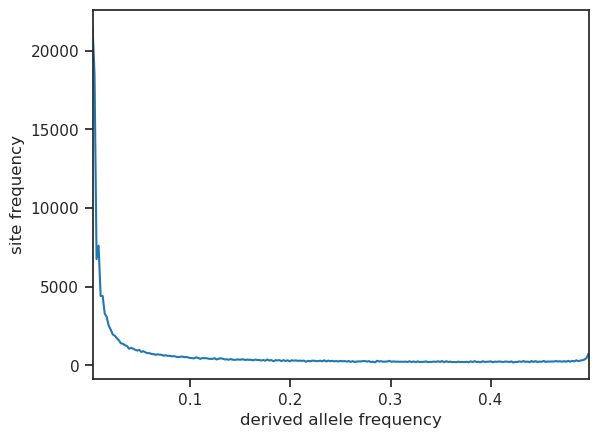

In [54]:
# plot the sfs of the derived allele
s = allel.sfs_folded(ac1)
allel.plot_sfs(s, yscale="linear", n=ac1.sum(axis=1).max())

In [55]:
biallelic = (ac.max_allele() == 1)
###This is the filter expression for biallelic sites
biallelic

<ChunkedArrayWrapper shape=(167572,) dtype=bool chunks=(167572,)
   nbytes=163.6K cbytes=16.4K cratio=10.0
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [56]:
# select only the biallelic variants
gt_biallelic = gt_filtered_snps.compress(biallelic)
gt_biallelic

<GenotypeChunkedArray shape=(163912, 246, 2) dtype=int8 chunks=(2562, 246, 2)
   nbytes=76.9M cbytes=11.1M cratio=6.9
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [57]:
n_variants = len(gt_biallelic)
n_variants

163912

In [58]:
pc_missing = gt_biallelic.count_missing(axis=0)[:] * 100 / n_variants
pc_het = gt_biallelic.count_het(axis=0)[:] * 100 / n_variants

## Samples

In [59]:
samples_var = callset_var['samples']
samples_var = list(samples_var)
samples_var

[b'AUT00154-001',
 b'AUT00154-002',
 b'AUT00154-003',
 b'AUT00154-004',
 b'AUT00154-005',
 b'AUT00154-006',
 b'AUT00154-007',
 b'AUT00154-008',
 b'AUT00154-009',
 b'AUT00154-010',
 b'AUT00154-011',
 b'AUT00154-012',
 b'AUT00154-013',
 b'AUT00154-014',
 b'AUT00154-015',
 b'AUT00154-016',
 b'AUT00154-017',
 b'AUT00154-018',
 b'AUT00154-019',
 b'AUT00154-020',
 b'AUT00154-021',
 b'AUT00154-022',
 b'AUT00154-023',
 b'AUT00154-024',
 b'AUT00154-025',
 b'BGR00003-001',
 b'BGR00003-002',
 b'BGR00003-003',
 b'BGR00003-004',
 b'BGR00003-005',
 b'BGR00003-006',
 b'BGR00003-007',
 b'BGR00003-008',
 b'BGR00003-009',
 b'BGR00003-010',
 b'BGR00003-011',
 b'BGR00003-012',
 b'BGR00003-013',
 b'BGR00003-014',
 b'BGR00003-015',
 b'BGR00003-016',
 b'BGR00003-017',
 b'BGR00003-018',
 b'BGR00003-019',
 b'BGR00003-020',
 b'BGR00003-021',
 b'BGR00003-022',
 b'BGR00003-023',
 b'BGR00003-024',
 b'BGR00003-025',
 b'BIH00043-001',
 b'BIH00043-002',
 b'BIH00043-003',
 b'BIH00043-004',
 b'BIH00043-005',
 b'BIH0004

In [60]:
samples_fn = '~/scratch/data/Storminalis/Sorbus_torminalis_sample_list_scikit-allel.txt'
samples = pandas.read_csv(samples_fn, sep='\t')
samples

,ID,Population
0,AUT00154-001,AUT00154
1,AUT00154-002,AUT00154
2,AUT00154-003,AUT00154
3,AUT00154-004,AUT00154
4,AUT00154-005,AUT00154
...,...,...
241,SVN00039-017,SVN00039
242,SVN00039-018,SVN00039
243,SVN00039-019,SVN00039
244,SVN00039-020,SVN00039


In [61]:
samples.Population.value_counts()

Population
AUT00154    25
BGR00003    25
BIH00043    25
CZE00004    25
DEU00012    25
DEU00024    25
DEU00097    25
DNK00059    25
SVN00017    25
SVN00039    21
Name: count, dtype: int64

In [62]:
populations = samples.Population.unique()
populations
###This identifiers come from the metadata file

array(['AUT00154', 'BGR00003', 'BIH00043', 'CZE00004', 'DEU00012',
       'DEU00024', 'DEU00097', 'DNK00059', 'SVN00017', 'SVN00039'],
      dtype=object)

## Gt frequency function

In [63]:
def plot_genotype_frequency(pc, title):
    fig, ax = plt.subplots(figsize=(24, 5))
    sns.despine(ax=ax, offset=24)
    left = np.arange(len(pc))
    palette = sns.color_palette("hls", 10)
    pop2color = {'AUT00154': palette[0],
                 'BGR00003': palette[5],
                 'BIH00043': palette[1],
                 'CZE00004': palette[6],
                 'DEU00012': palette[2],
                 'DEU00024': palette[7],
                 'DEU00097': palette[3],
                 'DNK00059': palette[8],
                 'SVN00017': palette[4],
                 'SVN00039': palette[9]}
    colors = [pop2color[p] for p in samples.Population]
    ax.bar(left, pc, color=colors)
    ax.set_xlim(0, len(pc))
    ax.set_xlabel('Sample index')
    ax.set_ylabel('Percent calls')
    ax.set_title(title)
    handles = [mpl.patches.Patch(color=palette[0]),
               mpl.patches.Patch(color=palette[5]),
               mpl.patches.Patch(color=palette[1]),
               mpl.patches.Patch(color=palette[6]),
               mpl.patches.Patch(color=palette[2]),
               mpl.patches.Patch(color=palette[7]),
               mpl.patches.Patch(color=palette[3]),
               mpl.patches.Patch(color=palette[8]),
               mpl.patches.Patch(color=palette[4]),
               mpl.patches.Patch(color=palette[9])]
    ax.legend(handles=handles, labels=['AUT00154', 'BGR00003', 'BIH00043', 'CZE00004', 'DEU00012',
       'DEU00024', 'DEU00097', 'DNK00059', 'SVN00017', 'SVN00039'], title='Population',
              bbox_to_anchor=(1, 1), loc='upper left')

## Plot missing

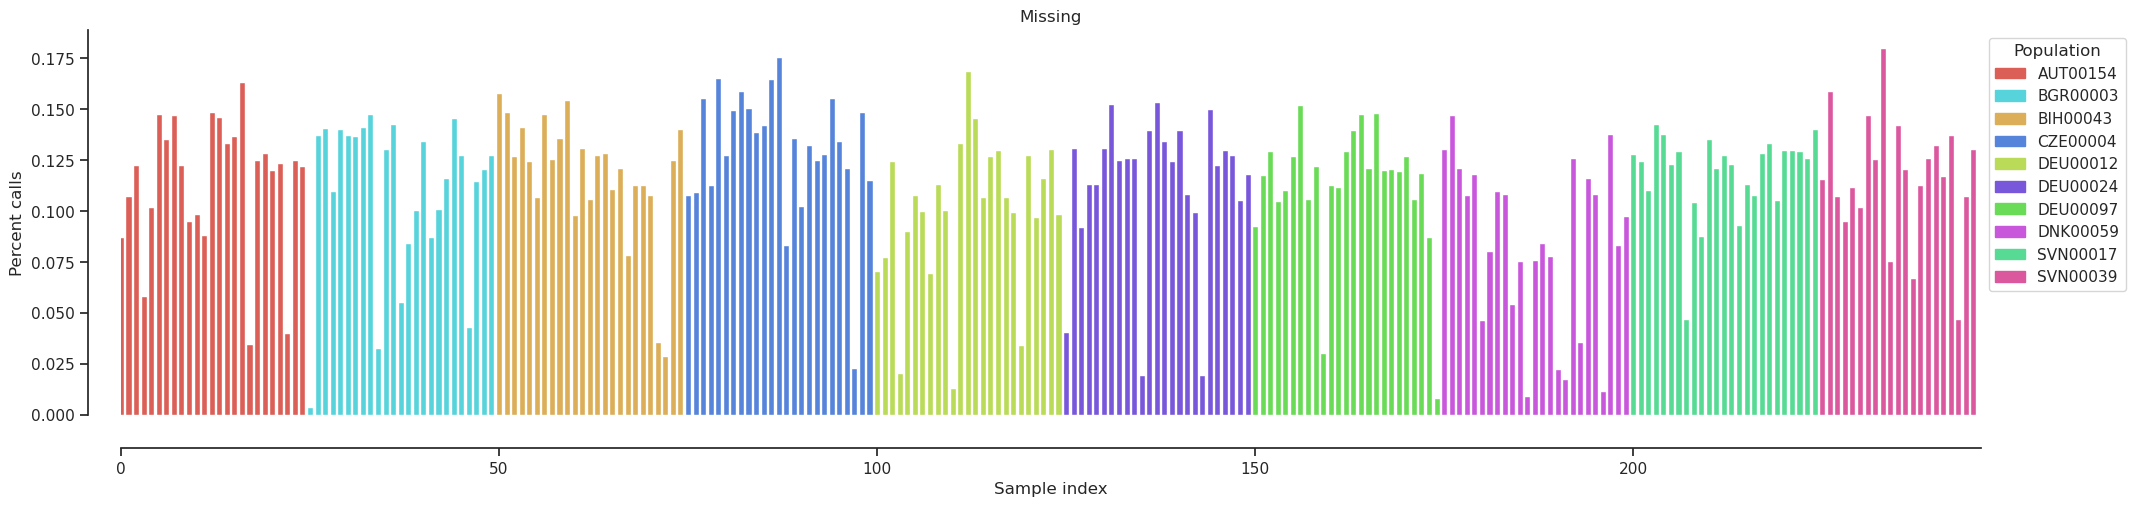

In [64]:
plot_genotype_frequency(pc_missing, 'Missing')

## Plot heterozygosity

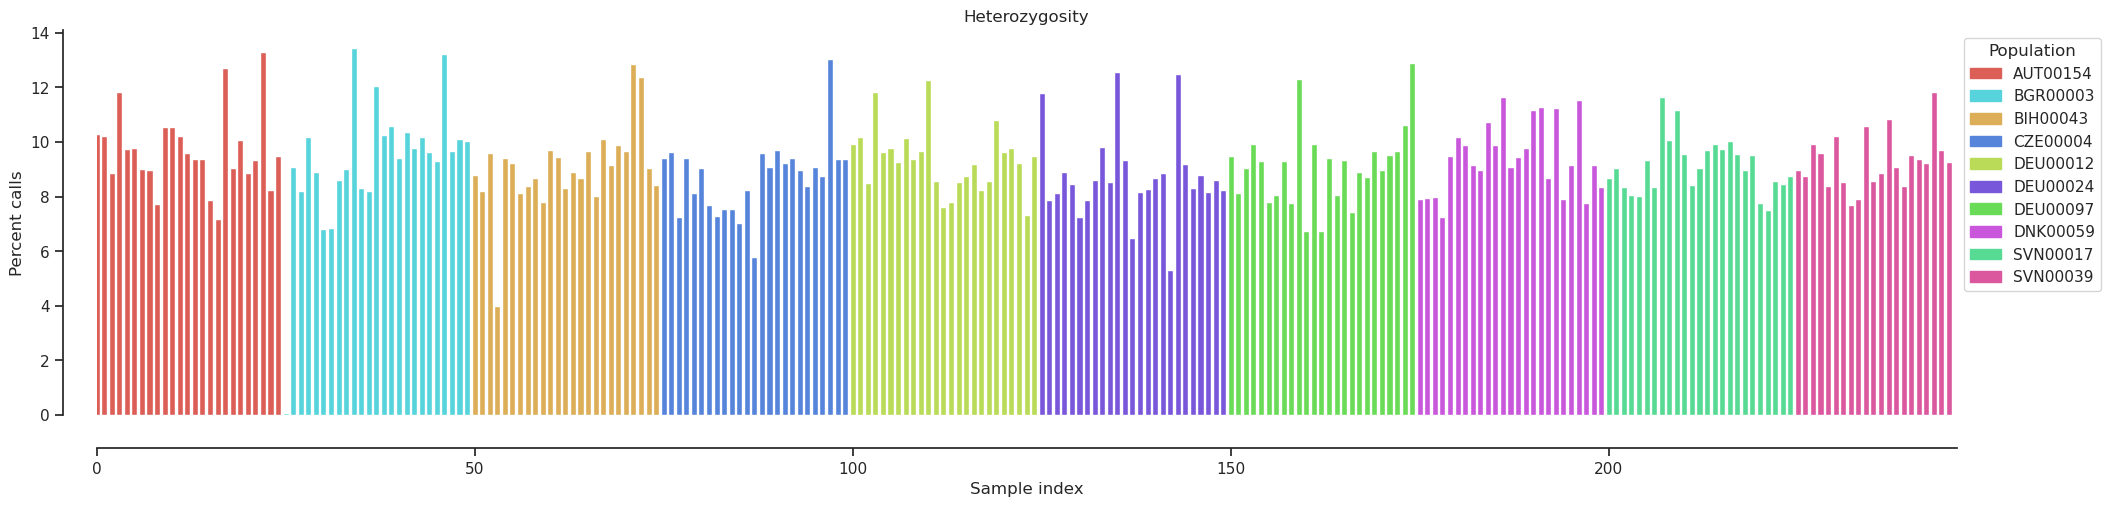

In [65]:
plot_genotype_frequency(pc_het, 'Heterozygosity')

## PCA

In [66]:
palette = sns.color_palette("hls",10)
pop_colours = {    
                'AUT00154': palette[0],
                 'BGR00003': palette[5],
                 'BIH00043': palette[1],
                 'CZE00004': palette[6],
                 'DEU00012': palette[2],
                 'DEU00024': palette[7],
                 'DEU00097': palette[3],
                 'DNK00059': palette[8],
                 'SVN00017': palette[4],
                 'SVN00039': palette[9]
}

In [67]:
def plot_pca_coords(coords, model, pc1, pc2, ax, sample_population):
    sns.despine(ax=ax, offset=5)
    x = coords[:, pc1]
    y = coords[:, pc2]
    for pop in populations:
        flt = (sample_population == pop)
        ax.plot(x[flt], y[flt], marker='o', linestyle=' ', color=pop_colours[pop], 
                label=pop, markersize=6, mec='k', mew=.5)
    ax.set_xlabel('PC%s (%.1f%%)' % (pc1+1, model.explained_variance_ratio_[pc1]*100))
    ax.set_ylabel('PC%s (%.1f%%)' % (pc2+1, model.explained_variance_ratio_[pc2]*100))
    

def fig_pca(coords, model, title, sample_population=None):
    if sample_population is None:
        sample_population = samples.Population
    # plot coords for PCs 1 vs 2, 3 vs 4
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 2, 1)
    plot_pca_coords(coords, model, 0, 1, ax, sample_population)
    ax = fig.add_subplot(1, 2, 2)
    plot_pca_coords(coords, model, 2, 3, ax, sample_population)
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
    fig.suptitle(title, y=1.02)
    fig.tight_layout()

In [68]:
ac2 = gt_biallelic.count_alleles()
ac2

<AlleleCountsChunkedArray shape=(163912, 2) dtype=int32 chunks=(40978, 2)
   nbytes=1.3M cbytes=423.9K cratio=3.0
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [69]:
flt = (ac2[:, :2].min(axis=1) > 1)
gf = gt_biallelic.compress(flt, axis=0)
gn = gf.to_n_alt()
gn

<ChunkedArrayWrapper shape=(140942, 246) dtype=int8 chunks=(4405, 246)
   nbytes=33.1M cbytes=7.4M cratio=4.5
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [70]:
coords1, model1 = allel.pca(gn, n_components=10, scaler='patterson')

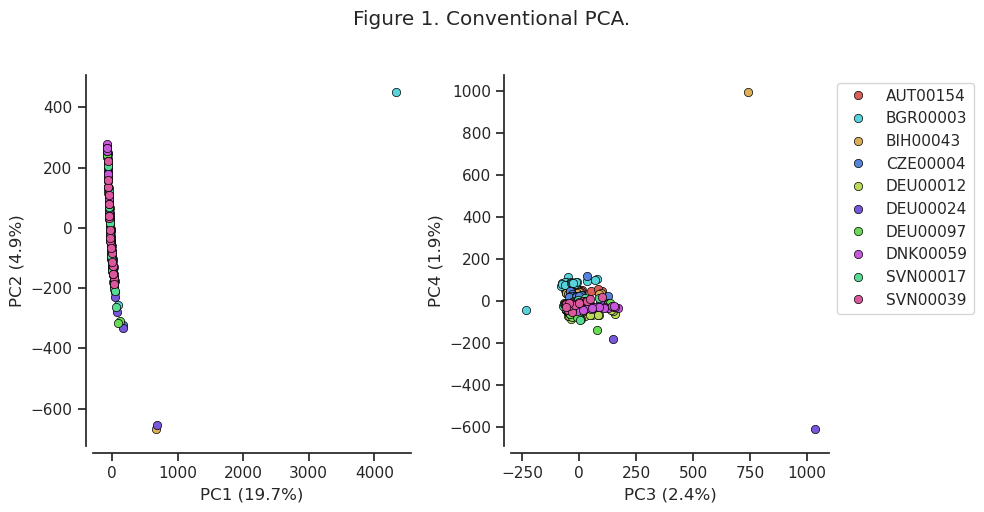

In [71]:
fig_pca(coords1, model1, 'Figure 1. Conventional PCA.')

In [72]:
outliers = coords1[:,0]>4000
samples[outliers]

,ID,Population
25,BGR00003-001,BGR00003


In [73]:
outliers = coords1[:,2]>700
samples[outliers]

,ID,Population
53,BIH00043-004,BIH00043
142,DEU00024-018,DEU00024
